# ASL Letter Detector: Object Detection

_Author:_ Omar Younis

---

## Contents
- [Problem Statement](#Problem-Statement)
- [Custom Yolov5 Creation](#Custom-Yolov5-Creation)
- [Custom Yolov5 Model Evaluation](#Custom-Yolov5-Model-Evaluation)
- [Deploying the Custom Yolov5 Model](#Deploying-the-Custom-Yolov5-Model)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)
---

## Problem Statement

ASL (American Sign Language) is a visual language that is expressed through different hand motions and positions to help those who are deaf or hard of hearing communicate. Many people who can hear are also learning this language. The goal of this project is to use machine learning and object detection to identify the different hand positions that correspond to the ASL alphabet. The model will then be deployed in an app to be used in image detection and real time detection.

---

## Custom Yolov5 Creation

[Yolov5](https://github.com/ultralytics/yolov5) is an open-source group of object detection models which have been trained on the [COCO dataset](https://cocodataset.org/#home). It has become wildly popular to used because in additions to being trained on the COCO dataset and of it's models can be "retrain", refined, on a custom dataset of the user's choosing. This allows user to quickly train their own custom models which are fairly effective. All of the pretrain models and custom models can be deployed with [PyTorch](https://pytorch.org/); an open-source machine learning python package.

The Yolov5 comes with it's own user friendly scripts to train and evaluate models, as well as a detection script to easily deploy your models. For this project I used these scripts, in addition to one of my own, to train and evaluate my own custom object detection model.

Before you can train a model, you need to have a dataset to use. After searching for a dataset to use, I came across an [ASL dataset](https://public.roboflow.com/object-detection/american-sign-language-letters) created by [Roboflow](https://roboflow.com/). The dataset was designed to work with Yolov5 models so it was ideal to use, as it came with the necessary files and folder structure that Yolov5 models need to train. The dataset was 1728 images long and came with a few image augmentations to help improve the model during training. All images were 416px square.

To run the model, there were a few things that needed to be set up. First of all, the model requires a `.yaml` file to train; usually this file is called `data.yaml`. In this file are the folder locations for the train and test image set as well as the number of classifications the model will be trained on and the list of the labels for each classifaction. The first thing we need to do is to make sure the file locations point to correct folders for our test and train images.

Once we have that done we can train and evaluated our model using only the terminal. First thing we need to do is to clone the Yolov5 repo (found [here](https://github.com/ultralytics/yolov5)) and point our terminal to the file location of the yolov5 repo.

In [ ]:
# Command I used in my terminal
!cd Documents/GitHub/yolov5/

Next we can run the `train.py` script using the following terminal command to start training the model locally. It is highly recommended you use a Nvidea GPU to train the model. If you do not have one, there is a very helpful [Google Colab](https://colab.research.google.com/drive/1gDZ2xcTOgR39tGGs-EZ6i3RTs16wmzZQ) notebook created by RoboFlow. If you choose to use this, Google may kick you off at any point and stop your training. It will also take much longer to run on Google Colab. For a comparison, I initially attempted to train my model using the Google Colab Notebook, after 4 hours of training, Google stop my run and I lost all myt progress. After switching training locally using my GPU, the same dataset took me 20 minutes to train.

The following command is used to train the model with an explination of what each of the variables are:

`python train.py --img *YOUR IMAGE SIZE* --batch *NUMBER OF BATCHS* --epochs *NUMBER OF EPOCHS* --data *FILE PATH TO YOUR DATA.YAML FILE* --weights *WHAT YOLOV5 MODEL IS YOUR BASE* --name *WHAT TO SAVE THE FINAL MODEL IN*`


In [ ]:
# Command I used in my terminal
!python train.py --img 416 --batch 16 --epochs 70 --data ../asl_letter_translator/data/data.yaml --weights yolov5s.pt --name 2000_model

Once the model was finished training we can then run the `val.py` script to run an evaluation on how good the model is:

`python val.py --img *YOUR IMAGE SIZE* --data *FILE PATH TO YOUR DATA.YAML FILE* --weights *FILE PATH TO YOUR CUSTOM YOLOV5 MODEL* --verbose --save-txt`

In [ ]:
# Command I used in my terminal
!python val.py --img 416 --data ../asl_letter_translator/data/data.yaml --weights ../asl_letter_translator/model_weights/asl_yolov5_model_v2.pt --verbose --save-txt

---

## Custom Yolov5 Model Evaluation

After running the `train.py` script, the Yolov5 repo creates a `.csv` file with evaluation metrics. It also creates a few plots that can be used to check how well you model is doing.

The most popular and useful way to evaluate a model is using the `mAP_0.5` score. `mAP` stands for `mean average precision`. The way this is calculated is taking the `precision` score of each class that the model is being trained on, and averaging them into one score. There are different type of `mAP` scores and this is where the trailing number behind the word `mAP` comes into play. When running an object detection model, the goal is to predict where the bounding box of the thing you are looking for is, and then classifying it. The `mAP_0.5` score looks at the bounding box of the prediction it made on an image, then checks the area overlap of the prediction to the actual location. If the percentage of that overlap is at least 50%, it is counted toward the overall `mAP_0.5` score.

#### Imports

In [3]:
"""This block contain all the imports needed for this document."""
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import cv2

plt.style.use('fivethirtyeight')
%matplotlib inline

In [21]:
data = pd.read_csv('../eval_data/results.csv')
data.columns = data.columns.str.strip()
data.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.087695,0.021803,0.086417,0.022707,0.21696,0.024233,0.009367,0.040025,0.011373,0.059651,0.000940,0.000940,0.091540
1,1,0.051233,0.021352,0.080032,0.035830,0.67372,0.081759,0.048856,0.026753,0.007488,0.056913,0.001889,0.001889,0.082989
2,2,0.045798,0.017236,0.077738,0.100390,0.30482,0.126800,0.081607,0.026469,0.005110,0.056151,0.002835,0.002835,0.074435
3,3,0.040242,0.015043,0.076770,0.098908,0.50649,0.164560,0.117890,0.023199,0.004176,0.054616,0.003775,0.003775,0.065875
4,4,0.037181,0.013483,0.075428,0.126500,0.56562,0.212950,0.140010,0.023045,0.003719,0.052001,0.004706,0.004706,0.057306


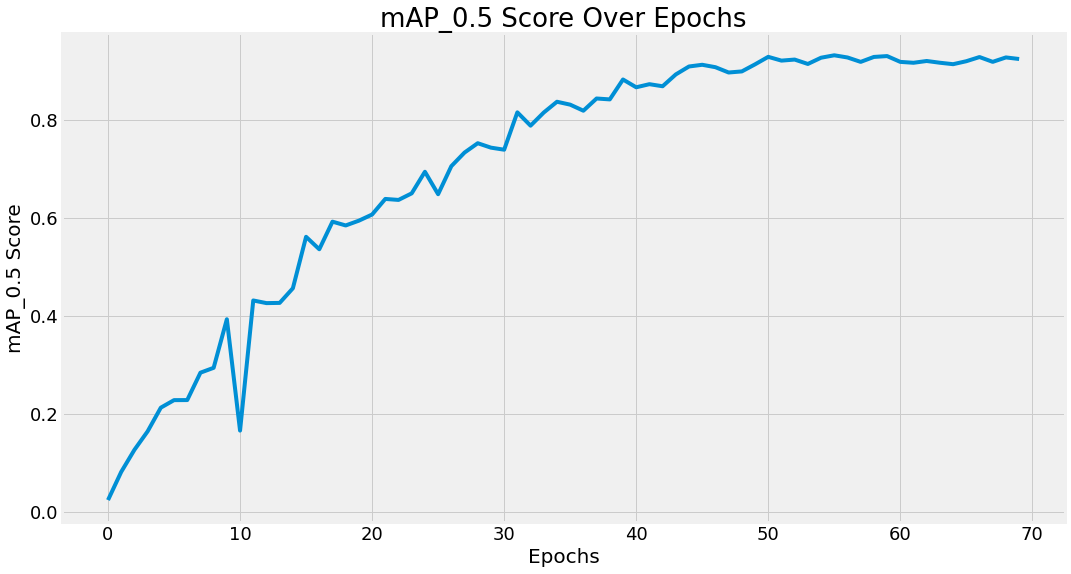

In [15]:
plt.figure(figsize=(16,9))
plt.plot(data['metrics/mAP_0.5'])

plt.title('mAP_0.5 Score Over Epochs', fontsize=26)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('mAP_0.5 Score', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

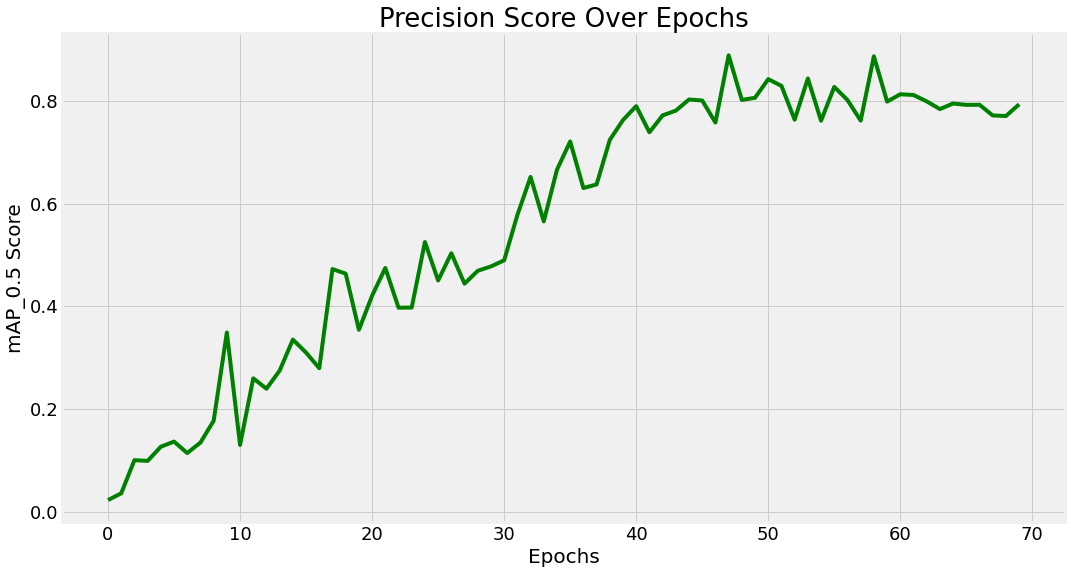

In [18]:
plt.figure(figsize=(16,9))
plt.plot(data['metrics/precision'], color='green')

plt.title('Precision Score Over Epochs', fontsize=26)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Precision Score', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

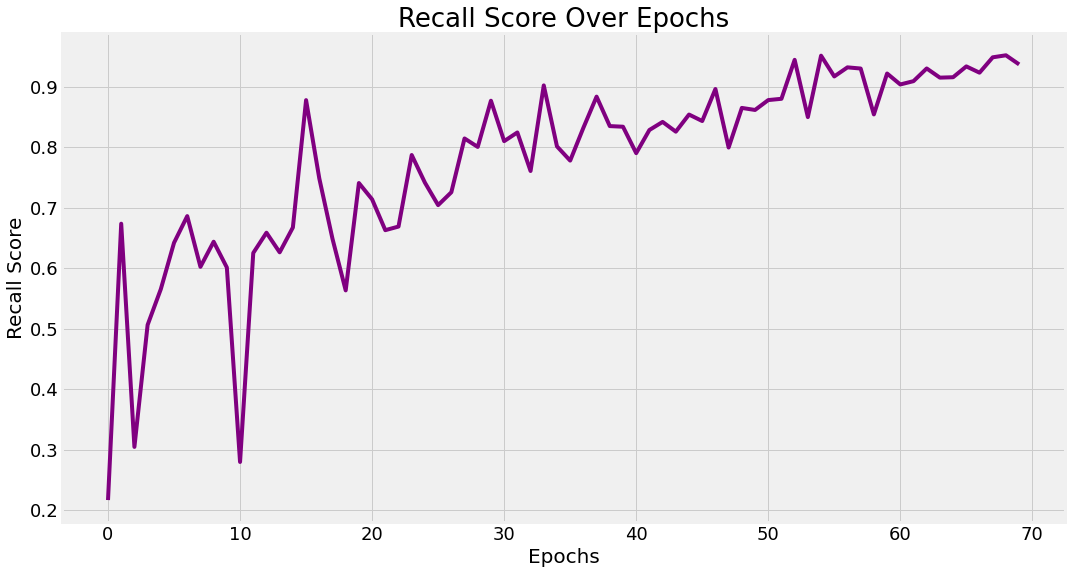

In [19]:
plt.figure(figsize=(16,9))
plt.plot(data['metrics/recall'], color='Purple')

plt.title('Recall Score Over Epochs', fontsize=26)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Recall Score', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [34]:
metrics_list = ['mAP_0.5', 'precision', 'recall']
for metric in metrics_list:
    print(f"{metric.title()}: \t{data['metrics/' + metric].iloc[-1]:.3f}")

Map_0.5: 	0.925
Precision: 	0.793
Recall: 	0.937


Looking at the three graphs above, it looks like our model is doing create. One thing to note is that is the model ran for more `epochs`, we would get marginal returns on the time taken to complete these epochs. Therefore `70 epochs` seems to be fine for our purposes.

Looking at our `mAP_0.5` score, we can see our model is achieving an overall `mAP_0.5` score of about `93%`. This means we have a pretty good model for detecting and classifying ASL letters in an image.

Another intersting metric that the Yolov5 model provides is a confusion matrix. Unlike other confusion matrices, this one shows what letters the model may mistake for another letter and what percentage of the time this happens.

<img src='../eval_data/confusion_matrix.png'>

To illistrate how this works, we can see that the model has some trouble distingushing `M` from `N`. If we look at the hand positions we can see why ([hand positions for ASL letters](https://upload.wikimedia.org/wikipedia/commons/c/c8/Asl_alphabet_gallaudet.svg)). We can see that there is a very subtle change between the two letters. The only difference it where the thumb is placed. We could combate this but increasing the size of our dataset. By having more images of `M`'s and `N`'s, the model would have a better change of distingushing them from each other.

---

## Deploying the Custom Yolov5 Model

#### NOTE
Before you can use your model in your repo, you will need to copy the `models` and `utils` folder from the `Yolov5 repo` and paste them in your repo or folder at the same level as your code. You will also need to copy the `requirements.txt` file from the `Yolov5 repo` and paste it in the same place as the file.

### Image Detection

In [43]:
# Setting

# Load model to use for predictions
filepath = 'C:/Users/Omar/Documents/GitHub/asl_letter_translator/code/'
model_file = 'asl_detector_model.pt'
model = torch.load(filepath + model_file)

# Select an Image from our Dataset and running a prediction.
img = "../data/train/images/L12_jpg.rf.34dafed010cca8b7e44c68bfb3565eee.jpg"

# Passing image into model for a prediction
prediction = model(img)
print(prediction.pred)

[tensor([[ 92.13750, 105.54375, 361.39999, 339.94998,   0.86328,  11.00000]], device='cuda:0')]


The prediction information above is defined by the following:

`[Bounding_box_corner_1, Bounding_box_corner_2, Bounding_box_corner_3, Bounding_box_corner_4, Probability_Prediction_Correct, Classification_Number]`

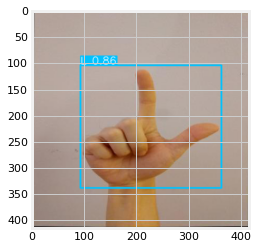

In [44]:
# Look at image with bounding box
plt.imshow(np.squeeze(prediction.render()));

### Real Time Detection

In [47]:
# Setting up camera object using OpenCV
capture_dev = cv2.VideoCapture(0)
while capture_dev.isOpened():
    
    # Reading data from webcam
    ret, frame = capture_dev.read()
    
    # Resizing frame from camera to 416px square
    # we need to do this since our model was trained on images that size.
    mod_frame = cv2.resize(frame, (416, 416), interpolation=cv2.INTER_AREA)
    
    # Make a prediction/detection on the current camera frame
    live_pred = model(mod_frame)
    
    # Label Popup window and render bounding box with prediction
    cv2.imshow('ASL Letter Detector', np.squeeze(live_pred.render()))
    
    # Create a shut down/escape from while loop.
    # If the 'q' key is pressed, break the look.
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Kills window and stops using (releases) the camera.
capture_dev.release()
cv2.destroyAllWindows()

---

## Conclusion and Recommendations

Although my model had a really good `mAP_0.5` score, it had a lot of trouble detecting and predicting ASL letters live. This is due to the dataset that the model used to train itself. If we look more closely at some of the images, they consist of mostly close ups of the hand in a position for a ASL letter. Contrast that with what frames the camera is feeding into the model. The frames consist of people, faces, objects in the background and more. Basically the images being feed into the model for prediction don't match the image style that were used to train the model.

Going forward, I would want to to actually create two different models. The first would be an object detection model that would detect hands in an image. Not hands in a particular position but any hands in an image. Also I would make sure I had way more images (closer to 10,000) and also make sure there are a bunch of things in the image other than hands. This way the model would be able to function better in a real world scenario where someone is using my model in front of their webcam.

Next I would want to take any image that has a hand detected in it and crop it so that the new image only consists of the hand. Then I would want to pass that through a CNN model; Pytorch has a really good one called `resNet`. Then the second model would classify why ASL letter the hand is making.

I would also want to looking into augmenting the images I have to increase my dataset. Augmenting the images means making random copies of random images in the dataset and then applying an augmentation like blur to the copy. This would increase the dataset for training but also teach the model how to handle images that aren't perfect.

That being said, my current model well especally during Image Detection when the image somewhat is similar to the training images that were used (i.e. close up on hands with not much in the background). Having a `mAP_0.5` score of about `93%` is extremely good for a model. I used the model in my `Streamlit` app, and was confident in it's image detection when uploading a single image. Like I said before, real time detection still needs more work so that it can work smoothly.

---